In [1]:
import networkx as nx 

In [3]:
print(nx.__version__)

2.8.2


for directed graph use this command G = nx.DiGraph()


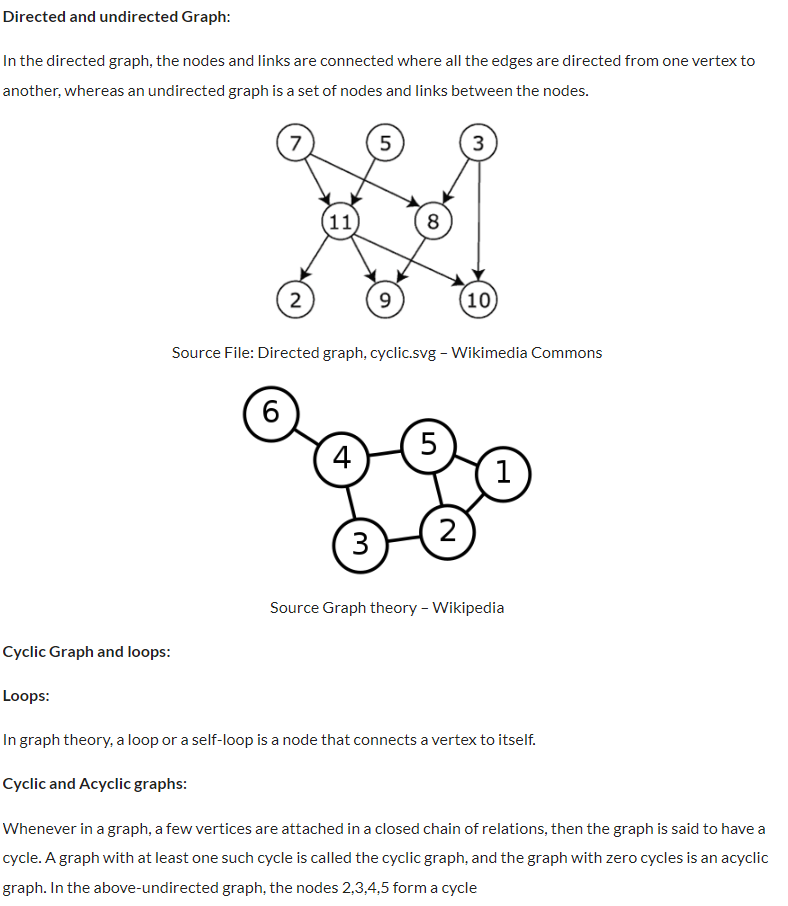

In [4]:
G = nx.Graph()

In [5]:
Nodes = list(range(1,7))

In [6]:
G.add_nodes_from(Nodes)

In [7]:
G

In [8]:
for i in G:
    print(i)

1
2
3
4
5
6


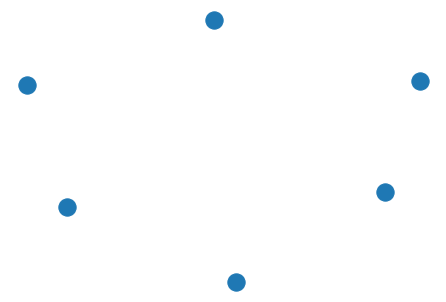

In [9]:
nx.draw(G)

In [12]:
from random import random
import random
import numpy as np
import matplotlib.pyplot as plt

In [154]:
nodes = list(range(1,100))
G = nx.Graph()   # create undirected graph
for n in nodes: # traverse through the nodes list above which has 100 numbers
    for i in range(0,2):
        n1 = random.randint(1,100)
        if n==n1 :   # ignore self loops
            continue
        w1 = np.round(random.random(),3)
        G.add_edge(n,n1,weight=w1)  # add random weights to edges 
len(G.nodes),len(G.edges)

(100, 193)

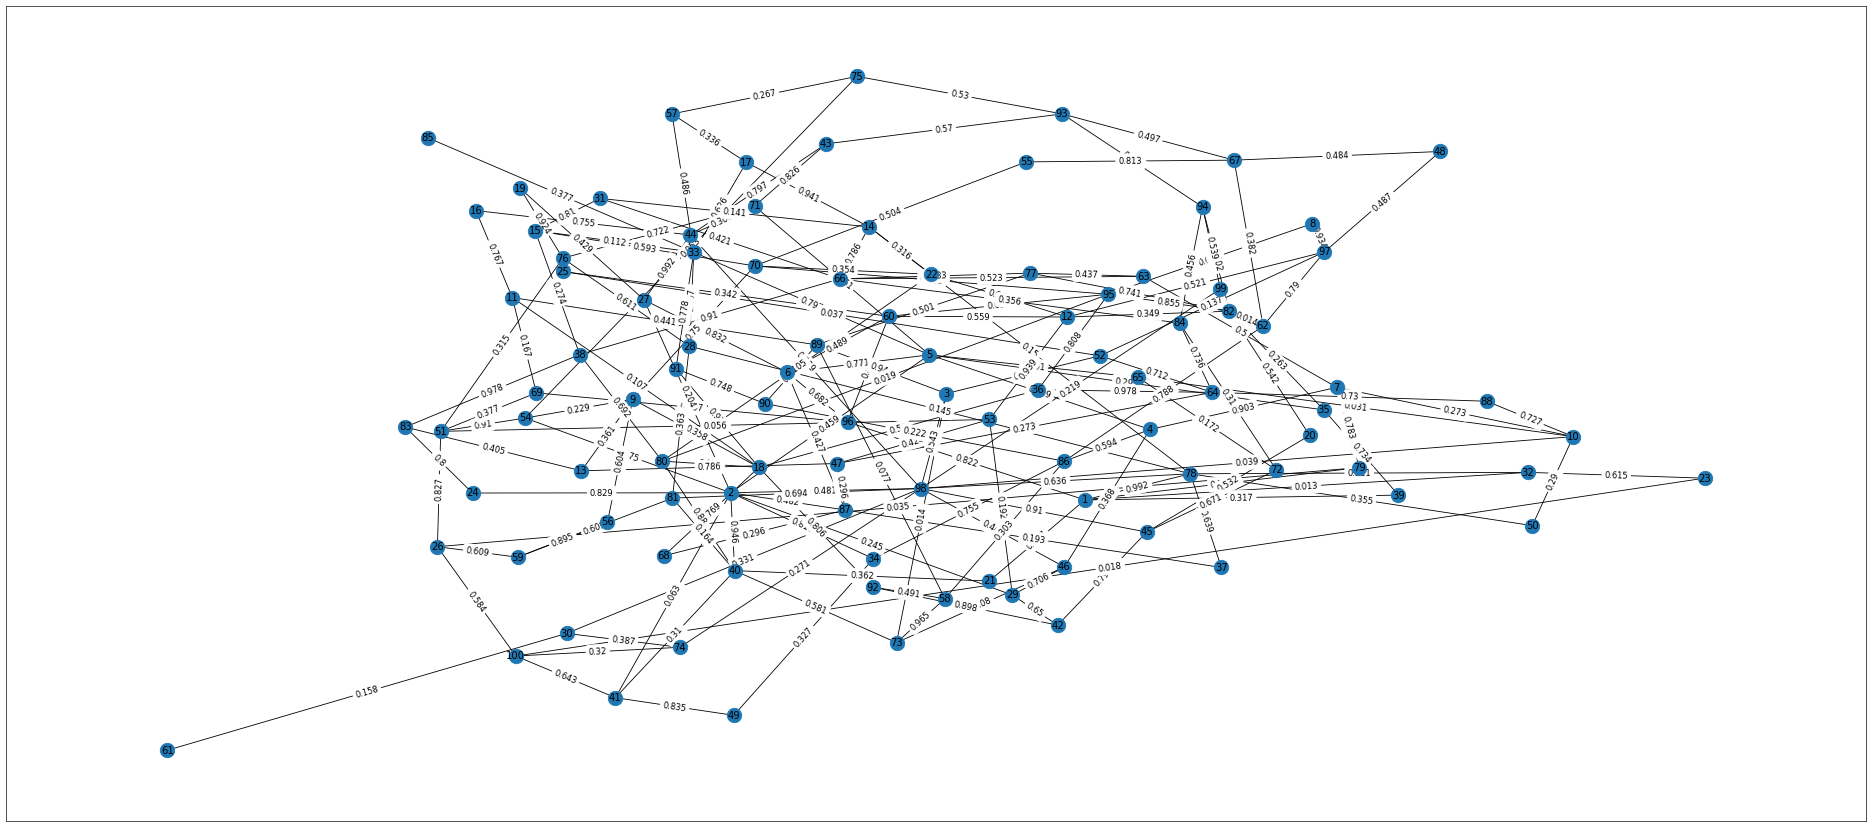

In [155]:
fig = plt.figure(1, figsize=(40, 18), dpi=60)
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
#nx.draw(G,with_labels=True,font_weight='normal')
plt.show()

In [75]:
import operator


In [148]:
Length = len(G.edges)   # length of the Graph – 193
eccentricity =  nx.eccentricity(G) # nx.eccentricity(G)[10] to check eccentricity for node 10
radius = nx.radius(G)   # 4
diameter = nx.diameter(G) # 7
density = nx.density(G)  # 0.038585858585858585
shortest_path_1_100 = nx.shortest_path(G,1,10) # [1, 33, 98, 88, 100])
pr = nx.pagerank(G,alpha=0.9)
print(sorted(pr.items(), key=operator.itemgetter(1), reverse=True)[0:5])
# Top five nodes of importance based on page rank -- [(7, 0.023270691594625876), (23, 0.020206209312297146), (63, 0.019264125648625598), (24, 0.018898324997949915), (4, 0.01869535054804308)] 
ndeg = G.degree(nodes)  # Node degrees will be printed like 
print(ndeg)

[(8, 0.19813502350162726), (4, 0.15810708102931234), (9, 0.13736729530856692), (7, 0.1179355604495893), (3, 0.11293631705982456)]
[(1, 1), (2, 2), (3, 3), (4, 4), (5, 3), (6, 2), (7, 3), (8, 4), (9, 3)]


In [77]:
Length

35

In [149]:
nx.eccentricity(G)[6] 

3

In [79]:
eccentricity

{1: 3,
 12: 4,
 5: 4,
 2: 4,
 6: 4,
 17: 3,
 3: 4,
 7: 4,
 8: 3,
 4: 4,
 14: 4,
 18: 4,
 11: 4,
 10: 4,
 20: 4,
 9: 4,
 16: 4,
 15: 4,
 13: 3,
 19: 4}

In [80]:
 nx.shortest_path(G,1,10)

[1, 17, 8, 10]

In [81]:
node_page_rank = {}
node_degree    = {}
for node in nodes:  # traverse through the nodes
    node_page_rank[node] = pr[node]
    node_degree[node] = ndeg[node]
nx.set_node_attributes(G, node_page_rank, 'PageRank')  # set attribute
nx.set_node_attributes(G, node_degree, 'nodeDegree')  # set attribute
for n in nodes: # Loop through every node
    print(n, G.nodes[n]['PageRank']) # Access every node by its Rank"


1 0.07123178058019487
2 0.02917616266556932
3 0.03505008157489785
4 0.03539008143524816
5 0.024247580734534445
6 0.08400205368318034
7 0.05956181693750043
8 0.07407076295270157
9 0.06422527416103435
10 0.05827980993300152
11 0.051065584983288594
12 0.05082274034977323
13 0.03760979809890904
14 0.04731162966320219
15 0.05598841702702444
16 0.04149591892592474
17 0.07953364620601533
18 0.02891011164089842
19 0.04229391730229289


In [82]:
from networkx.classes.function import all_neighbors
u = 5
v =[n for n in all_neighbors(G,u)]
for v in v:
    print(u,v,G.get_edge_data(u,v),"Degree ",G.nodes[v]['nodeDegree'],"Rank ",G.nodes[v]['PageRank'])

5 1 {'weight': 0.6135} Degree  4 Rank  0.07123178058019487
5 18 {'weight': 0.0871} Degree  3 Rank  0.02891011164089842
5 11 {'weight': 0.0842} Degree  4 Rank  0.051065584983288594


In [83]:
deg_centrality = nx.degree_centrality(G)
print(sorted(deg_centrality. items(), key=operator.itemgetter(1), reverse=True)[0:3])

close_centrality = nx.closeness_centrality(G)
print(sorted(close_centrality.items(), key=operator.itemgetter(1), reverse=True)[0:3])

bet_centrality = nx.betweenness_centrality(G, normalized = True, 
                                              endpoints = False)
print(sorted(bet_centrality .items(), key=operator.itemgetter(1), reverse=True)[0:3])


[(17, 0.3157894736842105), (8, 0.3157894736842105), (6, 0.2631578947368421)]
[(17, 0.5277777777777778), (8, 0.5277777777777778), (10, 0.4634146341463415)]
[(17, 0.3132553606237816), (8, 0.2732943469785575), (11, 0.12826510721247564)]


Label Propagation Algorithm

In [150]:
from networkx.algorithms.community.label_propagation import label_propagation_communities

In [156]:
communities = label_propagation_communities(G)
print([community for community in communities])

[{1, 2, 3, 20, 21, 25, 28, 29, 32, 37, 39, 40, 41, 42, 45, 46, 52, 54, 73, 78, 81, 92, 98, 99}, {96, 68, 6, 87}, {72, 65, 5, 71}, {4, 90, 7, 77, 86, 89, 58, 63}, {33, 85, 17, 57}, {56, 26, 59, 79}, {97, 35, 67, 8, 43, 12, 75, 48, 82, 94, 60, 93, 62, 95}, {36, 69, 70, 9, 11, 80, 18, 22, 55, 91}, {10, 50}, {13, 47}, {24, 83}, {66, 38, 14, 15, 84, 31}, {16, 44}, {27, 19}, {51, 76, 53}, {74, 100, 23}, {61, 30}, {49, 34}, {64, 88}]


Node Label Classification

In [144]:
topics = ['Machine Learning','Python','NLP','Neural Network','Computer Vision','Deep Learning','GCN','Algorithms','Statistics','AI']
k=0
nds = []
for t in topics :
    nlist = random.sample(range(k, 9), 7)
    print(nlist)
    for n in nlist:
        G.nodes[n]['label'] = t 
        nds.append(n)
    k+=9

[3, 0, 5, 8, 4, 7, 6]


KeyError: 0

In [125]:
from networkx.algorithms import node_classification
nc = node_classification.harmonic_function(G)
prediction = np.array(nc)

In [106]:
prediction

array(['Machine Learning', 'Python', 'Machine Learning',
       'Machine Learning', 'Machine Learning', 'Python',
       'Machine Learning', 'Machine Learning', 'Machine Learning',
       'Machine Learning', 'Python', 'Python', 'Python',
       'Machine Learning', 'Python', 'Machine Learning', 'Python',
       'Python', 'Python', 'Python'], dtype='<U16')

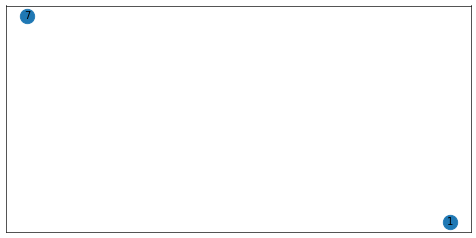

['Machine Learning', 'Machine Learning']

In [107]:
H = G.subgraph([1,51,37,21,7,90])
fig = plt.figure(1, figsize=(10, 5), dpi=60)
pos=nx.spring_layout(H) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(H,pos)
labels = nx.get_edge_attributes(H,'weight')
nx.draw_networkx_edge_labels(H,pos,edge_labels=labels)
plt.show()
H.edges
#EdgeView([(1, 51), (1, 37), (37, 21), (37, 90), (7, 21)])
node_classification.harmonic_function(H)
#['Machine Learning', 'Neural Network', 'NLP', 'Deep Learning', 'NLP', 'Neural Network']

In [157]:
graph = nx.Graph()

In [158]:
graph.add_node('Gabriel')
graph.add_node('Vitor')

In [162]:
graph.nodes()

NodeView(('Gabriel', 'Vitor'))

In [163]:
employees = ['Diego', 'Berga', 'Lucas', 'Ederson']

In [164]:
graph.add_nodes_from(employees)

In [165]:
graph.add_edge('Berga', 'Diego').nodes()

NodeView(('Gabriel', 'Vitor', 'Diego', 'Berga', 'Lucas', 'Ederson'))

In [173]:
graph.add_node('Walter')

In [179]:
graph.add_edge('Gabriel', 'Vitor')
graph.add_edge('Berga', 'Diego')
graph.add_edge('Berga', 'Lucas')
graph.add_edge('Berga', 'Ederson')
graph.add_edge('Ederson', 'Diego')
graph.add_edge('Berga', 'Gabriel')
graph.add_edge('Berga', 'Vitor')
graph.add_edge('Walter', 'Berga')
graph.add_edge('Walter', 'Vitor')
graph.add_edge('Walter', 'Diego')
graph.add_edge('Walter', 'Lucas')
graph.add_edge('Walter', 'Ederson')
graph.add_edge('Walter', 'Gabriel')


In [180]:
graph.edges()

EdgeView([('Gabriel', 'Vitor'), ('Gabriel', 'Berga'), ('Gabriel', 'Walter'), ('Vitor', 'Berga'), ('Vitor', 'Walter'), ('Diego', 'Berga'), ('Diego', 'Ederson'), ('Diego', 'Walter'), ('Berga', 'Lucas'), ('Berga', 'Ederson'), ('Berga', 'Walter'), ('Lucas', 'Walter'), ('Ederson', 'Walter')])

In [181]:
nx.info(graph)

/tmp/ipykernel_24772/461893942.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(graph)


'Graph with 7 nodes and 13 edges'

In [182]:
%matplotlib inline
import matplotlib.pyplot as plt

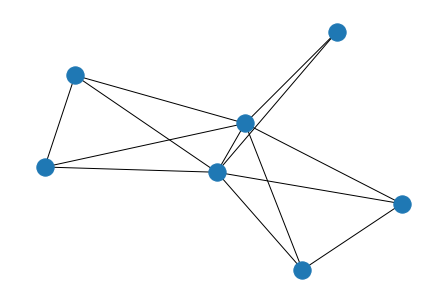

In [183]:
nx.draw(graph)

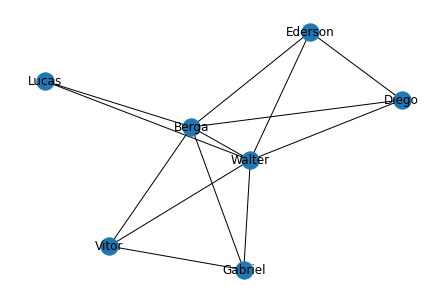

In [184]:
nx.draw(graph, with_labels=True)

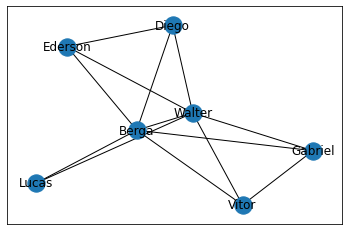

In [187]:
nx.spring_layout(graph)
nx.draw_networkx(graph)

In [188]:
nx.degree(graph, "Walter")

6

In [190]:
nx.degree(graph, "Berga")

6

In [191]:
nx.degree(graph, "Gabriel")

3

In [194]:
nx.shortest_path(graph, "Gabriel", "Lucas")

['Gabriel', 'Berga', 'Lucas']

In [195]:
nx.degree_centrality(graph)

{'Gabriel': 0.5,
 'Vitor': 0.5,
 'Diego': 0.5,
 'Berga': 1.0,
 'Lucas': 0.3333333333333333,
 'Ederson': 0.5,
 'Walter': 1.0}

In [196]:
nx.eigenvector_centrality(graph)

{'Gabriel': 0.32746677887637926,
 'Vitor': 0.32746677887637926,
 'Diego': 0.3274667788763792,
 'Berga': 0.5049326158477707,
 'Lucas': 0.24728150322167136,
 'Ederson': 0.32746677887637926,
 'Walter': 0.5049326158477707}

In [197]:
nx.betweenness_centrality(graph)

{'Gabriel': 0.0,
 'Vitor': 0.0,
 'Diego': 0.0,
 'Berga': 0.26666666666666666,
 'Lucas': 0.0,
 'Ederson': 0.0,
 'Walter': 0.26666666666666666}